## 감성분석(Sentiment Analysis) - 영화리뷰

In [1]:
import tensorflow as tf
import numpy as np

C:\Users\isfs0\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\isfs0\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\isfs0\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Naver Sentiment Movie Corpus v1.0 다운로드하기
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4893335/4893335 [==============================] - 0s 0us/step


In [32]:
# 데이터 읽어 저장하기 : encoding 형식으로 utf-8 을 지정해야합니다.
# 1. path_to_train_file / path_to_test_file 을 open() 해서 read()한후 decode(encoding='utf-8') 한 후
# train_text / test_text 에 저장합니다. 
with open(path_to_train_file, 'r', encoding='utf-8') as train_file:
    train_text = train_file.read()

with open(path_to_test_file, 'r', encoding='utf-8') as test_file:
    test_text = test_file.read()
# train_text = ... # ... your code
# test_text = ...  # ... your code
print('train text length:',len(train_text),' characters')
print('test  text length:',len(test_text),' characters')
print('\n')
print(train_text[:5])
print(train_text[:300])

train text length: 6937271  characters
test  text length: 2318260  characters


id	do
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [33]:
import pandas as pd
df_train = pd.read_csv(path_to_train_file,sep='\t')  # tsv
df_train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


#### 핵심코드

In [50]:
# X 값을 추출
# 각 문장을 '\n'으로 분리(split('\n') 사용
# -> 헤더제외 : split('\n')[1:] 
# -> '\t'으로 분리 
train_test_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0 ]
print(len(train_test_X))

150000


In [46]:
# Y 레이블을 추출합니다.
# 각 문장을 '\n'으로 분리 -> 헤더제외 -> '\t'으로 분리 -> 마지막 문자 정수로 변환하여 2차원으로 변환
train_Y = [row.split('\t')[2] for row in train_text.split('\n')[1:] if row.count('\t') > 0 ]
 # ... code here

train_Y = [int(label) for label in train_Y]


train_Y = np.array(train_Y)


train_Y = train_Y.reshape(-1,1)


print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (150000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [79]:
test_Y = [row.split('\t')[2] for row in test_text.split('\n')[1:] if row.count('\t') > 0 ] # ... code here
test_Y = [int(label) for label in test_Y]
test_Y = np.array(test_Y)
test_Y = test_Y.reshape(-1,1)

In [80]:
len(test_Y)

50000

In [37]:
print(train_test_X[:5])

['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']


### 텍스트 전처리

In [39]:
# train_text_X 데이터의 입력(X)에 대한 정제(Cleaning)하기
import re

def clean_str(string):
    string = re.sub(r"[^가-힝A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)
    
    return string.lower()

# 이미 생성된 train_text_X에 대한 전처리 수행
train_test_X = [clean_str(label) for label in train_test_X]

# 처음 5개의 전처리된 문장 출력
print(train_test_X[:5])

['아 더빙 진짜 짜증나네요 목소리', '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 솔직히 재미는 없다 평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화 ! 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']


In [8]:
# train_text_X 에 대해 문장을 띄어쓰기 단위로 단어 분리
sentences = ... # ... code here
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그의',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨에서',
  '늙어보이기만',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

In [40]:
sentences = [sentence.split() for sentence in train_test_X]
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그의',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨에서',
  '늙어보이기만',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

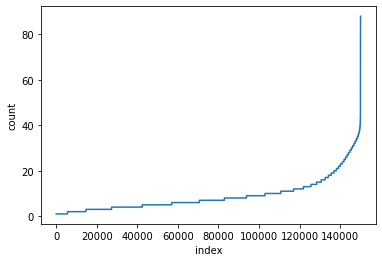

142587


In [9]:
# 150000개 문장의 단어 길이 확인
import matplotlib.pyplot as plt

# sentences 에 대해 각 문장의 길이를 구해를 구해  sentence_len 저장하기
sentence_len = ... # ... code here
# sentence_len 정렬하기
... # ... code here
# sentence_len 으로 plot 하기
plt.plot(sentence_len)
plt.xlabel('index')
plt.ylabel('count')
plt.show()

# sentence_len 길이가 25개 이하인 것 합계구하고 출력하기
print(...) # ... code here

# 결과 해석해보기

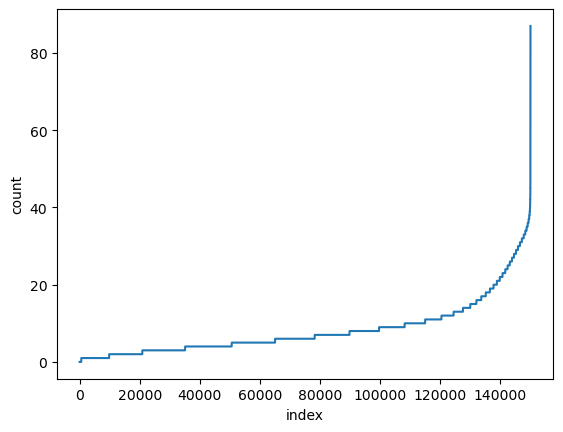

143105


In [41]:
import matplotlib.pyplot as plt

# sentences에 대해 각 문장의 길이를 구하여 sentence_len에 저장
sentence_len = [len(sentence) for sentence in sentences]

# sentence_len을 정렬
sentence_len.sort()

# sentence_len을 plot
plt.plot(sentence_len)
plt.xlabel('index')
plt.ylabel('count')
plt.show()

# sentence_len 길이가 25개 이하인 것의 합계를 계산하여 출력
short_sentences_count = sum(1 for length in sentence_len if length <= 25)
print(short_sentences_count)

In [42]:
sentences_new = []
for sentence in sentences:
    sentence_new = []  # 각 문장의 새로운 버전을 저장할 리스트
    for word in sentence:
        # 단어의 길이를 최대 5로 제한하고 앞에서 5글자까지만 사용
        word = word[:5]
        sentence_new.append(word)
    sentences_new.append(sentence_new)

sentences = sentences_new
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나'],
 ['너무재밓었'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨',
  '늙어보이기',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

### Tokenizer와 pad_sequences를 사용한 문장 전처리

In [11]:
#  Tokenizer와 pad_sequences를 사용한 문장 전처리하
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_length = 25

# 가장 빈도가 높은 20000개(max_words)의 단어들만 사용하여 토큰화 인스턴스 생성하기 : tokenizer 
tokenizer = ... # your code 

# 단어(sentences) 인덱스 구축
... # your code 

# 문자열을 정수 인덱스의 리스트로 변환
sequences = ... # your code 

# 시퀀스 패딩 : 벡터 표현을 얻음, padding = 'post' - 문장의 뒤부분으로 0을 패딩
train_X = ... # your code  
train_X[:5]

array([[   25,   884,     8,  5795,  1111,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  588,  5796,  6697,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [   71,   346,    31,    35, 10468,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  106,  5338,     4,     2,  2169,   869,   573,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_length = 25

# 가장 빈도가 높은 20000개(max_words)의 단어들만 사용하여 토큰화 인스턴스 생성하기 : tokenizer 
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# 단어(sentences) 인덱스 구축
tokenizer.fit_on_texts(sentences)

# 문자열을 정수 인덱스의 리스트로 변환
sequences = tokenizer.texts_to_sequences(sentences)

# 시퀀스 패딩 : 벡터 표현을 얻음, padding = 'post' - 문장의 뒤부분으로 0을 패딩
train_X = pad_sequences(sequences, maxlen=max_length, padding='post')

train_X[:5]

array([[   26,   904,     8,  5995,  1100,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  595,  5996,     1,     1,  6925,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    1,     1,    73,   353,    31,    36, 10791,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    1,     1,   107,  5505,     4,     2,  2204,     1,   853,
            1,     1,   572,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

### 학습 모델 구현

In [12]:
model = tf.keras.Sequential([
    # Embedding 층 : max_words, 임베딩된 단어 벡터의 차원 : 300,  입력 데이터의 크기 : max_len
    ... # your code
    # LSTM 층 : units = 50
    ... # your code                       # (?,50)
    # 출력 : class_num, activation = 'softmax'
    ... # your code 
])


# sparse_categorical_crossentropy : 정답 Y가 희소인 다중 분류 모델의 loss
# categorical_crossentropy: 다중 분류 모델의 loss

# loss 종류
# mean_squared_error : 평균제곱 오차
# binary_crossentropy : 이진분류 오차
# categorical_crossentropy : 다중 분류 오차. one-hot encoding 클래스, [0.2, 0.3, 0.5] 와 같은 출력값과 실측값의 오차값을 계산한다.
# sparse_categorical_crossentropy: 다중 분류 오차. 위와 동일하지만 , integer type 클래스라는 것이 다르다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                70200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [44]:
import tensorflow as tf

model = tf.keras.Sequential([
    # Embedding 층 : max_words, 임베딩된 단어 벡터의 차원 : 300, 입력 데이터의 크기 : max_length
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=300, input_length=max_length),
    # LSTM 층 : units = 50
    tf.keras.layers.LSTM(units=50),
    # 출력 : class_num, activation = 'softmax'
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 6070302 (23.16 MB)
Trainable params: 6070302 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 감성 분석 모델 학습 
# 학습을 진행하고 학습 과정을 history 에 저장하기. epochs= 3 validation_split = 0.2
history = ... # 

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 177s 1ms/sample - loss: 0.4372 - accuracy: 0.7813 - val_loss: 0.3836 - val_accuracy: 0.8223
Epoch 2/5
120000/120000 [==============================] - 177s 1ms/sample - loss: 0.3259 - accuracy: 0.8470 - val_loss: 0.3843 - val_accuracy: 0.8190
Epoch 3/5
120000/120000 [==============================] - 167s 1ms/sample - loss: 0.2731 - accuracy: 0.8682 - val_loss: 0.4382 - val_accuracy: 0.8187
Epoch 4/5
120000/120000 [==============================] - 168s 1ms/sample - loss: 0.2303 - accuracy: 0.8865 - val_loss: 0.4773 - val_accuracy: 0.8113
Epoch 5/5
120000/120000 [==============================] - 177s 1ms/sample - loss: 0.1957 - accuracy: 0.9020 - val_loss: 0.5676 - val_accuracy: 0.8094


In [45]:
history = model.fit(train_X, train_Y, epochs=5, validation_split=0.2)

Epoch 1/5
3750/3750 [==============================] - 312s 83ms/step - loss: 0.4262 - accuracy: 0.7891 - val_loss: 0.3721 - val_accuracy: 0.8233
Epoch 2/5
3750/3750 [==============================] - 430s 115ms/step - loss: 0.3136 - accuracy: 0.8513 - val_loss: 0.3726 - val_accuracy: 0.8233
Epoch 3/5
3750/3750 [==============================] - 206s 55ms/step - loss: 0.2607 - accuracy: 0.8754 - val_loss: 0.4225 - val_accuracy: 0.8143
Epoch 4/5
3750/3750 [==============================] - 487s 130ms/step - loss: 0.2169 - accuracy: 0.8940 - val_loss: 0.4661 - val_accuracy: 0.8129
Epoch 5/5
3750/3750 [==============================] - 742s 198ms/step - loss: 0.1798 - accuracy: 0.9101 - val_loss: 0.5388 - val_accuracy: 0.8129


In [48]:
history.history['loss']
history.history['val_loss']
history.history['accuracy']
history.history['val_accuracy']

[0.8233000040054321,
 0.8233000040054321,
 0.8142666816711426,
 0.8129333257675171,
 0.8128666877746582]

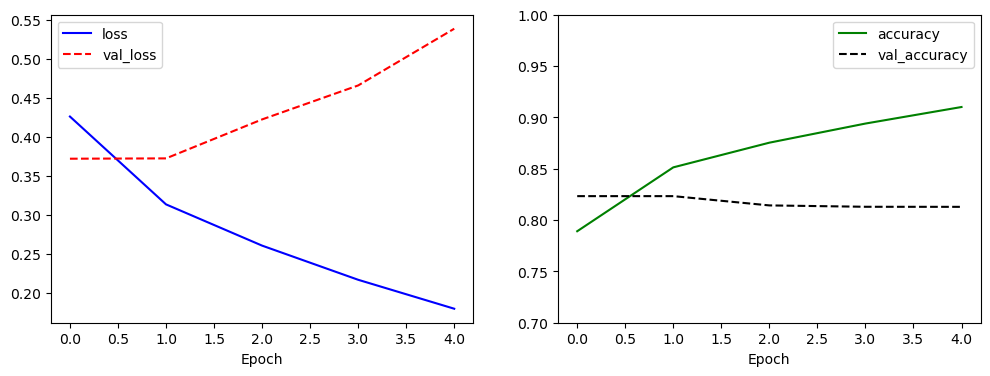

In [49]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

### 정확도 측정

In [16]:
# test_X 값 추출하기 - train_text_X 와 같은 방식으로하세요
test_text_X = ... # ... code here

# test_text_X  데이터의 입력(X)에 대한 정제(Cleaning)하기
test_text_X =... # ... code here

# 문장을 띄어쓰기 단위로 단어 분리하여 test_sentences 저장하기 : split()
test_sentences =  ... # ... code here

# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
test_sentences_new = []
for sentence in test_sentences:
    test_sentences_new.append(...)   # ... code here
test_sentences = test_sentences_new

# 테스트 데이터 셋 토근화하기 : texts_to_sequences()
test_sentences = ... # ... code here
# 테스트 데이터 셋 패딩하기 : pad_sequences() - 문장의 뒤부분으로 0을 패딩
test_X = ... # ... code here    

test_X[:5]  # 25개의 길이로 패딩이 완성됨

array([[  594,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  357,     9,  4626,   990,    69,  3348,  2773,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 2110,    32, 12562,   506,  1450,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17857,   109, 12074,   244, 18890,    11,  3365,   348,   468,
        12715,     5,     5,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [56]:
# test_X 값 추출하기 - test_text_X와 같은 방식으로
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
# test_text_X 데이터의 입력(X)에 대한 정제(Cleaning)하기 (clean_str 함수를 사용)
test_text_X = [clean_str(text) for text in test_text_X]

# 문장을 띄어쓰기 단위로 단어 분리하여 test_sentences에 저장하기
test_sentences = [text.split() for text in test_text_X]

# 단어 정제 및 문장 길이 줄임: 각 단어의 최대 길이를 5로 고정하고 문장의 최대 길이를 25로 제한
max_word_length = 5
max_sentence_length = 25

test_sentences_new = []
for sentence in test_sentences:
    new_sentence = []
    for word in sentence:
        new_word = word[:max_word_length]
        new_sentence.append(new_word)
    if len(new_sentence) > max_sentence_length:
        new_sentence = new_sentence[:max_sentence_length]
    test_sentences_new.append(new_sentence)

test_sentences = test_sentences_new

# 테스트 데이터 셋 토큰화하기
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# 테스트 데이터 셋 패딩하기: 문장의 뒤부분으로 0을 패딩
test_X = pad_sequences(test_sequences, maxlen=max_length, padding='post')

test_X[:5]  # 25개의 길이로 패딩이 완성됨

array([[  605,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  363,     9,     1,  4618,   987,    69,     1,  3304,  2626,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [18207,  2104,    32, 12981,   519,  1484,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    1, 18415,   109, 11405,   243, 16931,    11,  3476,   355,
          457,     1, 13119, 19312,     5,     5,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [76]:
# train_X = [int(label) for label in train_X]
# test_X = [int(label) for label in test_X]

# train_X = np.array(train_X)
test_X = np.array(test_X)
len(test_X)

# train_X = train_X.reshape(-1,1)
# test_X = test_X.reshape(-1,1)

50000

In [81]:
accr = model.evaluate(test_X,test_Y,verbose=0)

In [82]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.542
  Accuracy: 0.809


### 예측

In [66]:
# 임의의 문장 감성 분석 예측 결과 확인해보기
test_sent = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sent = test_sent.split(' ') # ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
test_sents = []
new_sent = []

for word in test_sent:
    new_sent.append(word)
    test_sents.append(new_sent[:])
# test_sentences  # 9개

test_sequences = tokenizer.texts_to_sequences(test_sents) 
test_X_new = pad_sequences(test_sequences, padding='post', maxlen=25) 
# test_X_new

prediction = model.predict(test_X_new)  # 분류할 값 2개가 확률로 출력

for idx, sentence in enumerate(test_sents):
    print(sentence)
    print(prediction[idx])

1/1 [==============================] - 1s 701ms/step
['재미있을']
[0.23572236 0.7642777 ]
['재미있을', '줄']
[0.27332377 0.7266762 ]
['재미있을', '줄', '알았는데']
[0.43785915 0.5621408 ]
['재미있을', '줄', '알았는데', '완전']
[0.40198466 0.59801537]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.43239376 0.5676063 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.4185793 0.5814207]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.8497623  0.15023771]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.9947482  0.00525183]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9901738  0.00982617]


In [68]:
# # GPT Code
# def sentiment_predict(text):
#     # 입력 문장 전처리
#     text = clean_str(text)
#     text = text.split()  # 띄어쓰기 단위로 분리
#     input_data = []
#     new_sentence = []
#     for word in text:
#         new_sentence.append(word)
#         input_data.append(new_sentence[:])
    
#     # 토큰화 및 패딩
#     sequences = tokenizer.texts_to_sequences(input_data)
#     input_sequence = pad_sequences(sequences, padding='post', maxlen=25)
    
#     # 감정 예측
#     prediction = model.predict(input_sequence)
    
#     # 결과 출력
#     if prediction[0][0] > prediction[0][1]:
#         print(f"{prediction[0][0]*100:.2f}% 확률로 부정 리뷰입니다.")
#     else:
#         print(f"{prediction[0][1]*100:.2f}% 확률로 긍정 리뷰입니다.")

In [83]:
# GPT Code 수정
def sentiment_predict(text):
    # 입력 문장 전처리
    text = text.split()  # 띄어쓰기 단위로 분리
    test_sentences = []
    new_sentence = []

    for word in text:
        new_sentence.append(word)
        test_sentences.append(new_sentence[:])

    # 토큰화 및 패딩
    sequences = tokenizer.texts_to_sequences(test_sentences)
    input_sequence = pad_sequences(sequences, padding='post', maxlen=25)
    
   

    # 감정 예측
    prediction = model.predict(input_sequence)
    print(prediction)

    # 결과 출력
    if prediction[0][0] > prediction[0][1]:
        print(f"{prediction[0][0]*100:.2f}% 확률로 부정 리뷰입니다.")
    else:
        print(f"{prediction[0][1]*100:.2f}% 확률로 긍정 리뷰입니다.")
        
    for idx, sentence in enumerate(test_sentences):
        score = prediction[idx]
    
#     if(score[0] > score[1]):
#         print("{:.2f}% 확률로 부정 리뷰입니다.".format(score[0] * 100))
#     else:
#         print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score[0]) * 100)) 

# 감정 분석 예측 수행
sentiment_predict('이 영화 개꿀잼 ~')
sentiment_predict('넘 재미없어 내내 졸았어요')
sentiment_predict('돈이 아까워요 ')
sentiment_predict('이 영화 하품만 나와요~')
sentiment_predict('두번 봐도 재미있어요')
sentiment_predict('이 영화 핵노잼 ㅠㅠ')
sentiment_predict('이 영화 왜 만든거야')
sentiment_predict('이 영화 꼭 보세요')
sentiment_predict('안녕하세요')
sentiment_predict('그저 그래요')
sentiment_predict('좋아하는 사람들이 있을지는 모르겠지만 나는 그저그랬다')

1/1 [==============================] - 0s 74ms/step
58.28% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 36ms/step
82.38% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 21ms/step
97.94% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 40ms/step
58.28% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 33ms/step
72.11% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 32ms/step
58.28% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 33ms/step
58.28% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 43ms/step
58.28% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 34ms/step
69.75% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 35ms/step
57.25% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 34ms/step
87.39% 확률로 긍정 리뷰입니다.


In [71]:
# 감성 분석 함수 구현 - 강사님 코드 
def sentiment_predict(test_sentence):
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    new_sentence = []

    for word in test_sentence:
        new_sentence.append(word)
        test_sentences.append(new_sentence[:])

    sequences = tokenizer.texts_to_sequences(test_sentences) 
    test_X_new = pad_sequences(sequences,padding='post', maxlen=25) 

    prediction = model.predict(test_X_new)  

    for idx, sentence in enumerate(test_sentences):
        score = prediction[idx]
    
    if(score[0] > score[1]):
        print("{:.2f}% 확률로 부정 리뷰입니다.".format(score[0] * 100))
    else:
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score[0]) * 100)) 

In [21]:
sentiment_predict('이 영화 개꿀잼 ~')

99.49% 확률로 긍정 리뷰입니다.


In [72]:
sentiment_predict('이 영화 개꿀잼 ~')

1/1 [==============================] - 0s 52ms/step
99.20% 확률로 긍정 리뷰입니다.


In [73]:
sentiment_predict('넘 재미없어 내내 졸았어요')

1/1 [==============================] - 0s 32ms/step
99.99% 확률로 부정 리뷰입니다.


In [23]:
sentiment_predict('돈이 아까워요 ')

99.81% 확률로 부정 리뷰입니다.


In [24]:
sentiment_predict('이 영화 하품만 나와요~')

99.74% 확률로 부정 리뷰입니다.


In [25]:
sentiment_predict('두번 봐도 재미있어요')

98.67% 확률로 긍정 리뷰입니다.


In [26]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

99.81% 확률로 부정 리뷰입니다.


In [27]:
sentiment_predict('이 영화 왜 만든거야')

99.68% 확률로 부정 리뷰입니다.


In [28]:
sentiment_predict('이 영화 꼭 보세요')

86.39% 확률로 긍정 리뷰입니다.


In [29]:
sentiment_predict('안녕하세요')

59.57% 확률로 긍정 리뷰입니다.


In [30]:
sentiment_predict('그저 그래요')

99.84% 확률로 부정 리뷰입니다.


In [34]:
sentiment_predict('좋아하는 사람들이 있을지는 모르겠지만 나는 그저그랬다')

62.67% 확률로 부정 리뷰입니다.
